# Gaussian Processes Regression Introduction


In [4]:
# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#         Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: BSD 3 clause

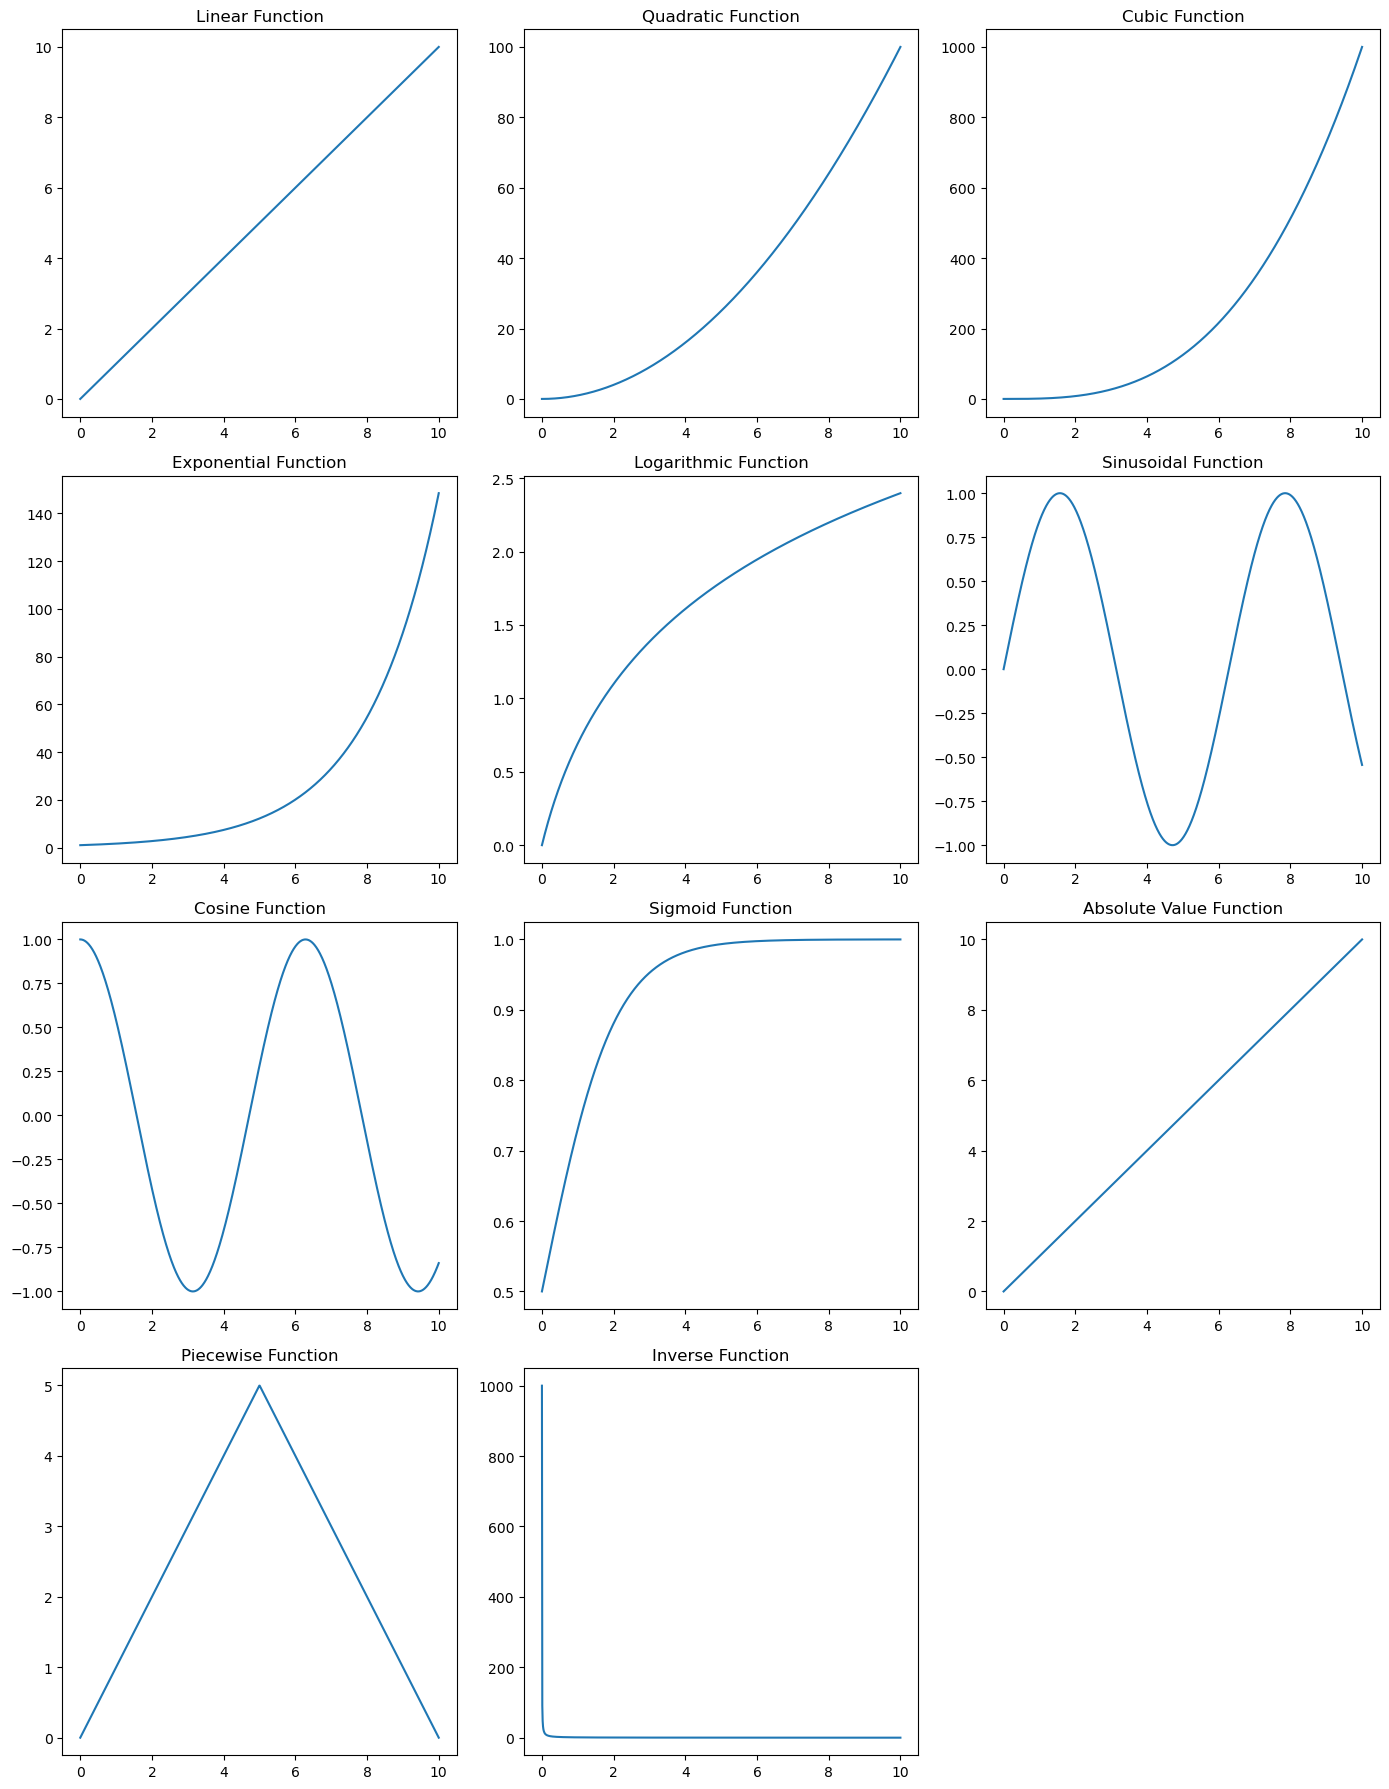

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the data range
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X)  # Base y values for experimentation

# Define different types of functions

def linear_func(X, k=1):
    return k * X

def quadratic_func(X, a=1, b=0, c=0):
    return a * X**2 + b * X + c

def cubic_func(X, a=1, b=0, c=0, d=0):
    return a * X**3 + b * X**2 + c * X + d

def exponential_func(X, r=0.5):
    return np.exp(r * X)

def logarithmic_func(X, a=1):
    return a * np.log1p(X)  # np.log1p(X) is log(1 + X)

def sinusoidal_func(X, amplitude=1, frequency=1):
    return amplitude * np.sin(frequency * X)

def cosine_func(X, amplitude=1, frequency=1):
    return amplitude * np.cos(frequency * X)

def sigmoid_func(X, a=1, b=0):
    return 1 / (1 + np.exp(-a * (X - b)))

def absolute_func(X, a=1, b=0):
    return a * np.abs(X - b)

def piecewise_func(X):
    return np.where(X < 5, X, 10 - X)

def inverse_func(X, a=1):
    return a / (X + 1e-3)  # Avoid division by zero

# Calculate function values for each function
y_linear = linear_func(X)
y_quad = quadratic_func(X)
y_cubic = cubic_func(X)
y_exp = exponential_func(X)
y_log = logarithmic_func(X)
y_sin = sinusoidal_func(X)
y_cos = cosine_func(X)
y_sigmoid = sigmoid_func(X)
y_abs = absolute_func(X)
y_piecewise = piecewise_func(X)
y_inverse = inverse_func(X)

# Plot each function
plt.figure(figsize=(14, 18))

plt.subplot(4, 3, 1)
plt.plot(X, y_linear)
plt.title("Linear Function")

plt.subplot(4, 3, 2)
plt.plot(X, y_quad)
plt.title("Quadratic Function")

plt.subplot(4, 3, 3)
plt.plot(X, y_cubic)
plt.title("Cubic Function")

plt.subplot(4, 3, 4)
plt.plot(X, y_exp)
plt.title("Exponential Function")

plt.subplot(4, 3, 5)
plt.plot(X, y_log)
plt.title("Logarithmic Function")

plt.subplot(4, 3, 6)
plt.plot(X, y_sin)
plt.title("Sinusoidal Function")

plt.subplot(4, 3, 7)
plt.plot(X, y_cos)
plt.title("Cosine Function")

plt.subplot(4, 3, 8)
plt.plot(X, y_sigmoid)
plt.title("Sigmoid Function")

plt.subplot(4, 3, 9)
plt.plot(X, y_abs)
plt.title("Absolute Value Function")

plt.subplot(4, 3, 10)
plt.plot(X, y_piecewise)
plt.title("Piecewise Function")

plt.subplot(4, 3, 11)
plt.plot(X, y_inverse)
plt.title("Inverse Function")

plt.tight_layout()
plt.show()


Linear Regression - Noise Free Target

In [130]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [139]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1000)
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

/Users/jamesguan/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/jamesguan/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


316**2 * RBF(length_scale=787)

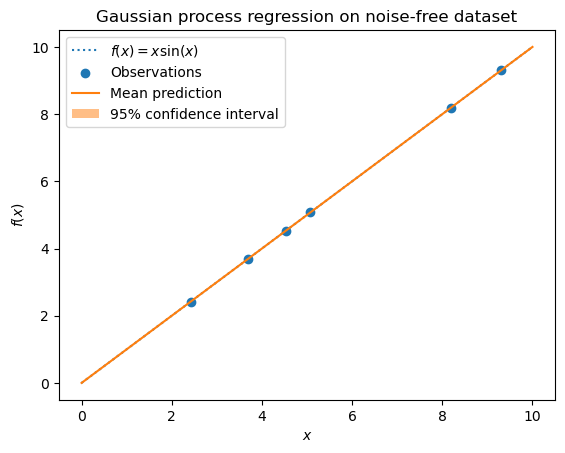

In [140]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")